Using data of all countries from EdStatsCountry.csv and EdStatsData.csv 

In [1]:
import pandas as pd
# select Region and Income Group to apply on df
countryDf = pd.read_csv("EdStatsCountry.csv")
countryDf = countryDf.iloc[:,[0,7,8]]

df = pd.read_csv("EdStatsData.csv")
df = df.iloc[91625:886930,:49]
df = df.join(countryDf.set_index('Country Code'), on='Country Code')
# rearrange cols index
cols = df.columns.tolist()
cols = cols[:2] + cols[-2:] + cols[2:-2]
df = df[cols]

In [ ]:
temp = dfGroupByIdc('SE.TOT.ENRR')
temp = temp.assign(mean=temp.mean(axis=1)).iloc[:,[0,1,-1]].dropna()
temp.to_csv('ENRR.csv',sep=',')

In [5]:
def dfGroupByIdc(x, input_df = df):
    '''
    input dataframe is groupped by indicator code
    :@param x: str, indicator code
    :@param input_df: DataFrame, input dataframe
    :@return: int, The sum of a and b
    '''
    import pandas as pd
    assert isinstance(x, str)
    assert isinstance(input_df, pd.core.frame.DataFrame)
    
    x_df = input_df[(input_df['Indicator Code']== x)]
    return x_df

In [6]:
def corrList(x_df, y_df, thresh = 22):    
    '''
    Calculate correlation of data of two indicator
    :@param x_df: DataFrame, dataframe of one indicator
    :@param y_df: DataFrame, dataframe of another indicator
    :@param thresh: int, threshold of NAN
    :@return: tuple, list of r and mean of r
    '''
    import pandas as pd
    import scipy.stats as sc
    
    assert isinstance(x_df, pd.core.frame.DataFrame)
    assert isinstance(y_df, pd.core.frame.DataFrame)
    assert len(x_df) == len(y_df)
    assert isinstance(thresh, int) and 0 <= thresh <=45
    
    # 51(45) columns, [6,50]
    # if x has corresponding y of each country for more than thresh, it counts as a useful data.
    r = []
    for i in range(len(x_df)):
        count = 0
        x_lst=[]
        y_lst=[]
        for k in range(6,51):
            if(pd.notnull(y_df.iloc[i,k]) and pd.notnull(x_df.iloc[i,k])):
                y_lst.append(y_df.iloc[i,k])
                x_lst.append(x_df.iloc[i,k])
                count+=1
        if count >= thresh:
            r.append(sc.pearsonr(x_lst, y_lst)[0])
    mean = sum([i for i in r])/len(r)
    return (r, mean)

In [4]:
def histplot(r, x_label = ''):
    '''
    Histogram according to input pearson correlation list
    :@param r: list, pearson correlation list
    :@param x_label: str, xlabel name
    '''
    assert isinstance(r, list) and isinstance(x_label,str)
    import matplotlib.pyplot as plt
    import numpy as np
    bins=np.arange(-1,1,0.125)
    
    plt.hist(r,bins,alpha=0.7,edgecolor='black')
    plt.axvline(sum(r)/len(r), color='k', linestyle='dashed', linewidth=1)
    plt.title( 'Distribution of Correlation Coefficient\n')
    plt.xlabel(x_label)
    plt.ylabel('Number of countries')
    plt.show()

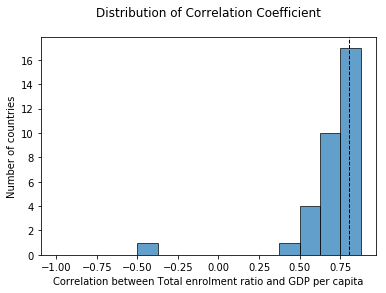

In [5]:
# Gross enrolment ratio, primary to tertiary, both sexes (%)
# GDP per capita of each country
x = dfGroupByIdc('SE.TOT.ENRR')
y = dfGroupByIdc('NY.GDP.PCAP.CD')
histplot(corrList(x, y, 28)[0], 'Correlation between Total enrolment ratio and GDP per capita')

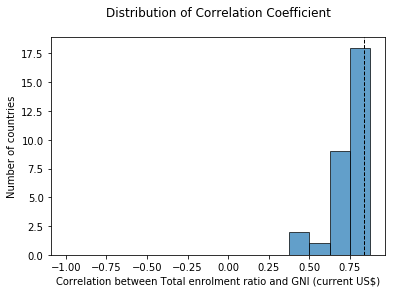

In [6]:
# world
# Gross enrolment ratio, primary to tertiary, both sexes (%)
# GNI (current US$)
x = dfGroupByIdc('SE.TOT.ENRR')
y = dfGroupByIdc('NY.GNP.MKTP.CD')
histplot(corrList(x, y,28)[0],'Correlation between Total enrolment ratio and GNI (current US$)')

In [3]:
def corrMatrix(idc_lst,threshold = 22):
    '''
    Calculate correlation of data of several indicator
    :@param idc_lst: DataFrame, dataframe of one indicator
    :@param threshold: int, threshold of NAN
    :@return: 2D array, array of correlation coefficient
    '''
    assert isinstance(idc_lst, list) and isinstance(threshold, int)
    import numpy as np
    feat = []
    for i in idc_lst:
        feat.append(dfGroupByIdc(i))

    arr = np.zeros((len(feat),len(feat)))
    for i in range(len(feat)):
        for k in range(len(feat)):
             arr[i][k] = corrList(feat[i], feat[k], thresh = threshold)[1]
                
    return arr

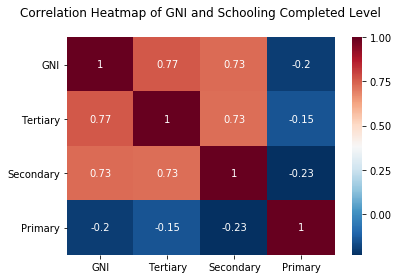

In [8]:
# GNI (current US$) NY.GNP.MKTP.CD
# Percentage of population age 25+ with primary schooling. Total (Incomplete and Completed Primary)
# BAR.PRM.ICMP.15UP.ZS
# Percentage of population age 25+ with secondary schooling. Total (Incomplete and Completed Secondary)
# BAR.SEC.ICMP.15UP.ZS
# Percentage of population age 25+ with tertiary schooling. Total (Incomplete and Completed Tertiary)
# BAR.TER.ICMP.15UP.ZS

idc_lst = ['NY.GNP.PCAP.CD','BAR.TER.ICMP.25UP.ZS','BAR.SEC.ICMP.25UP.ZS','BAR.PRM.ICMP.25UP.ZS']
arr = corrMatrix(idc_lst , threshold= 9)

import matplotlib.pyplot as plt
import seaborn as sns

col_name = ['GNI','Tertiary','Secondary','Primary']
plt.figure()
ax = sns.heatmap(pd.DataFrame(arr,columns=col_name,index = col_name),cmap='RdBu_r',annot = True)
plt.yticks(rotation=0) 
plt.title('Correlation Heatmap of GNI and Schooling Completed Level\n')
plt.show()

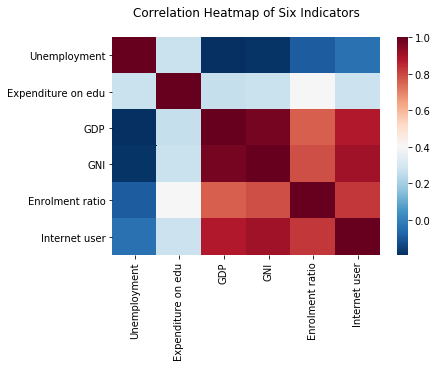

In [8]:
# Gross enrolment ratio, primary to tertiary, both sexes (%) SE.TOT.ENRR
# Unemployment, total (% of total labor force) SL.UEM.TOTL.ZS
# GDP per capita (current US$) NY.GDP.PCAP.CD
# GNI (current US$) NY.GNP.MKTP.CD
# Internet user IT.NET.USER.P2
# Government expenditure on education as % of GDP (%) SE.XPD.TOTL.GD.ZS

idc_lst = ['SL.UEM.TOTL.ZS','SE.XPD.TOTL.GD.ZS','NY.GDP.PCAP.CD','NY.GNP.MKTP.CD','SE.TOT.ENRR',
           'IT.NET.USER.P2']
arr = corrMatrix(idc_lst)

import matplotlib.pyplot as plt
import seaborn as sns
col_name = ['Unemployment','Expenditure on edu','GDP','GNI','Enrolment ratio','Internet user']
plt.figure()
ax = sns.heatmap(pd.DataFrame(arr, columns=col_name, index = col_name),cmap='RdBu_r')
plt.title('Correlation Heatmap of Six Indicators\n')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = dfGroupByIdc('UIS.GER.123',input_df=df[(df['Income Group']== 'High income: OECD')])
y = dfGroupByIdc('SL.UEM.TOTL.ZS',input_df=df[(df['Income Group']== 'High income: OECD')])
r1 = pearson(x, y)[0]

x = dfGroupByIdc('UIS.GER.123',input_df=df[(df['Income Group']== 'High income: nonOECD')])
y = dfGroupByIdc('SL.UEM.TOTL.ZS',input_df=df[(df['Income Group']== 'High income: nonOECD')])
r2 = pearson(x, y)[0]

x = dfGroupByIdc('UIS.GER.123',input_df=df[(df['Income Group']== 'Lower middle income')])
y = dfGroupByIdc('SL.UEM.TOTL.ZS',input_df=df[(df['Income Group']== 'Lower middle income')])
r3 = pearson(x, y)[0]

bins=np.arange(-1,1,0.125)
plt.hist([r1,r3], bins, stacked=True,alpha=0.5,edgecolor='black')
plt.legend(('High income: OECD','High income: nonOECD','Lower middle income'),loc='best')
plt.show()

In [10]:
def averAndstd(idc_code, income):
    '''
    Calculate average and standard deviation of a income group data given a indicator
    :@param idc_code: str, indicator code
    :@param income: str, income group
    :@return: tuple, average and standard deviation
    '''
    temp = dfGroupByIdc(idc_code,input_df=df[(df['Income Group']== income)]).mean()
    aver = temp.mean()
    std = temp.std()
    return (aver, std)

In [11]:
income_lst = ['Low income','Lower middle income','Upper middle income'
              ,'High income: nonOECD','High income: OECD']
averF = []
stdF = []
averM = []
stdM = []
for i in income_lst:
    averF.append(averAndstd('UIS.GER.1T6.F', i)[0])
    stdF.append(averAndstd('UIS.GER.1T6.F', i)[1])
    averM.append(averAndstd('UIS.GER.1T6.M', i)[0])
    stdM.append(averAndstd('UIS.GER.1T6.M', i)[1])

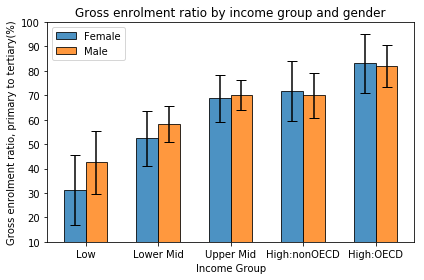

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8

fig, ax = plt.subplots()
rects1 = plt.bar(index, averF, bar_width,alpha = 0.8, edgecolor = 'black',capsize=5, 
                 label = 'Female', yerr = stdF)
rects2 = plt.bar(index + bar_width, averM, bar_width,alpha = 0.8, edgecolor='black',capsize=5, 
                 label='Male', yerr = stdM)

plt.xticks(index + bar_width*0.5, ('Low','Lower Mid', 'Upper Mid',
                               'High:nonOECD','High:OECD'))
plt.legend(loc = 'upper left')
plt.xlabel('Income Group')
plt.ylabel('Gross enrolment ratio, primary to tertiary(%)')
plt.title('Gross enrolment ratio by income group and gender')
ax.set_ylim( ymin = 10 )
plt.tight_layout()
plt.show()